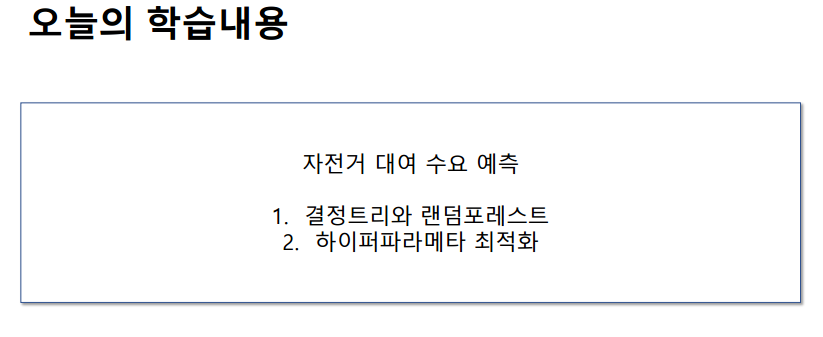

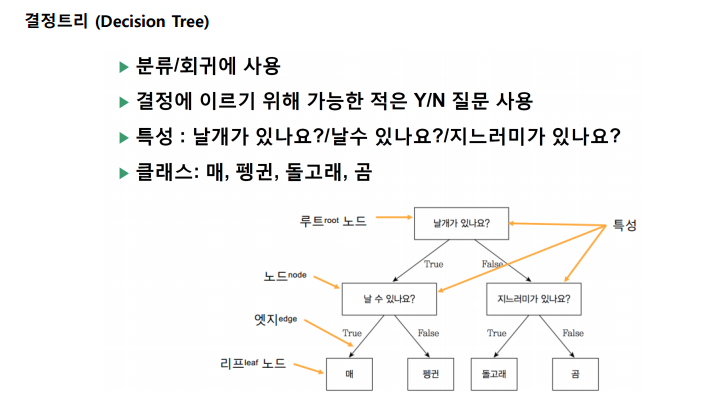

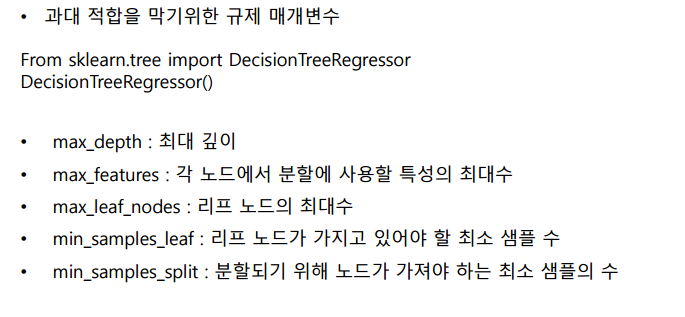

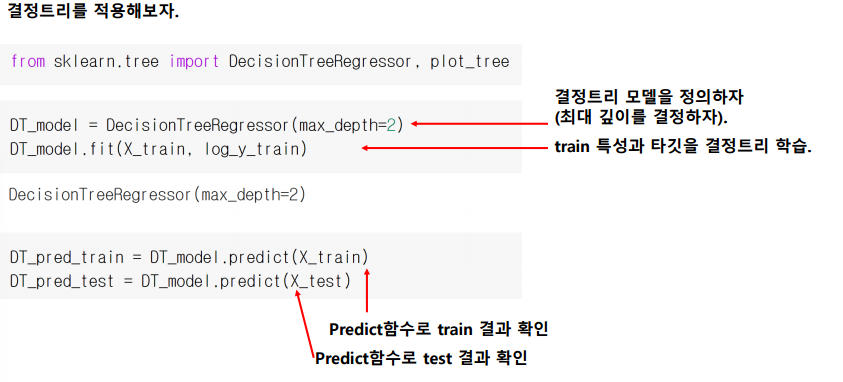

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
X_train = pd.read_excel('X_train.xlsx')
X_test = pd.read_excel('X_test.xlsx')
y_train = pd.read_excel('y_train.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [3]:
log_y_train = np.log(y_train)

In [4]:
log_y_test = np.log(y_test)

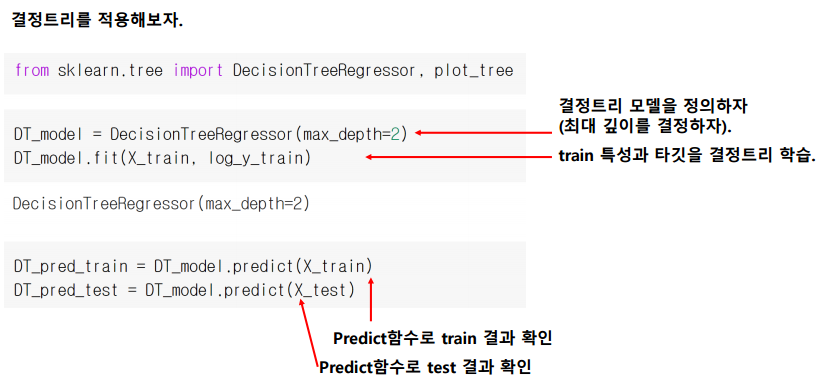

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [8]:
DT_model = DecisionTreeRegressor(max_depth = 2)

In [9]:
DT_model.fit(X_train, log_y_train)

DecisionTreeRegressor(max_depth=2)

In [10]:
DT_pred_train = DT_model.predict(X_train)
DT_pred_test = DT_model.predict(X_test)

In [11]:
DT_pred_train

array([5.48718768, 5.48718768, 4.75057829, ..., 5.48718768, 5.48718768,
       2.5762991 ])

In [12]:
DT_pred_test

array([4.75057829, 4.75057829, 2.5762991 , ..., 5.48718768, 2.5762991 ,
       5.48718768])

In [13]:
def RMSLE(y_true, y_pred):

  y_pred=y_pred.reshape(len(y_pred),1)

  y_true = np.exp(y_true)
  y_pred = np.exp(y_pred)
  
  log_true = np.log(y_true+1)
  log_pred = np.log(y_pred+1)

  output = np.sqrt(np.mean((log_true-log_pred)**2))
  return output

In [14]:
RMSLE(log_y_train, DT_pred_train)

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    0.838535
dtype: float64

In [15]:
RMSLE(log_y_test, DT_pred_test)

count    0.858792
dtype: float64

In [16]:
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'hour <= 6.5\nsquared_error = 2.225\nsamples = 8707\nvalue = 4.547'),
 Text(0.25, 0.5, 'hour <= 5.5\nsquared_error = 1.602\nsamples = 2533\nvalue = 2.77'),
 Text(0.125, 0.16666666666666666, 'squared_error = 1.401\nsamples = 2160\nvalue = 2.576'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.282\nsamples = 373\nvalue = 3.895'),
 Text(0.75, 0.5, 'temp <= 15.17\nsquared_error = 0.655\nsamples = 6174\nvalue = 5.275'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.701\nsamples = 1775\nvalue = 4.751'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.481\nsamples = 4399\nvalue = 5.487')]

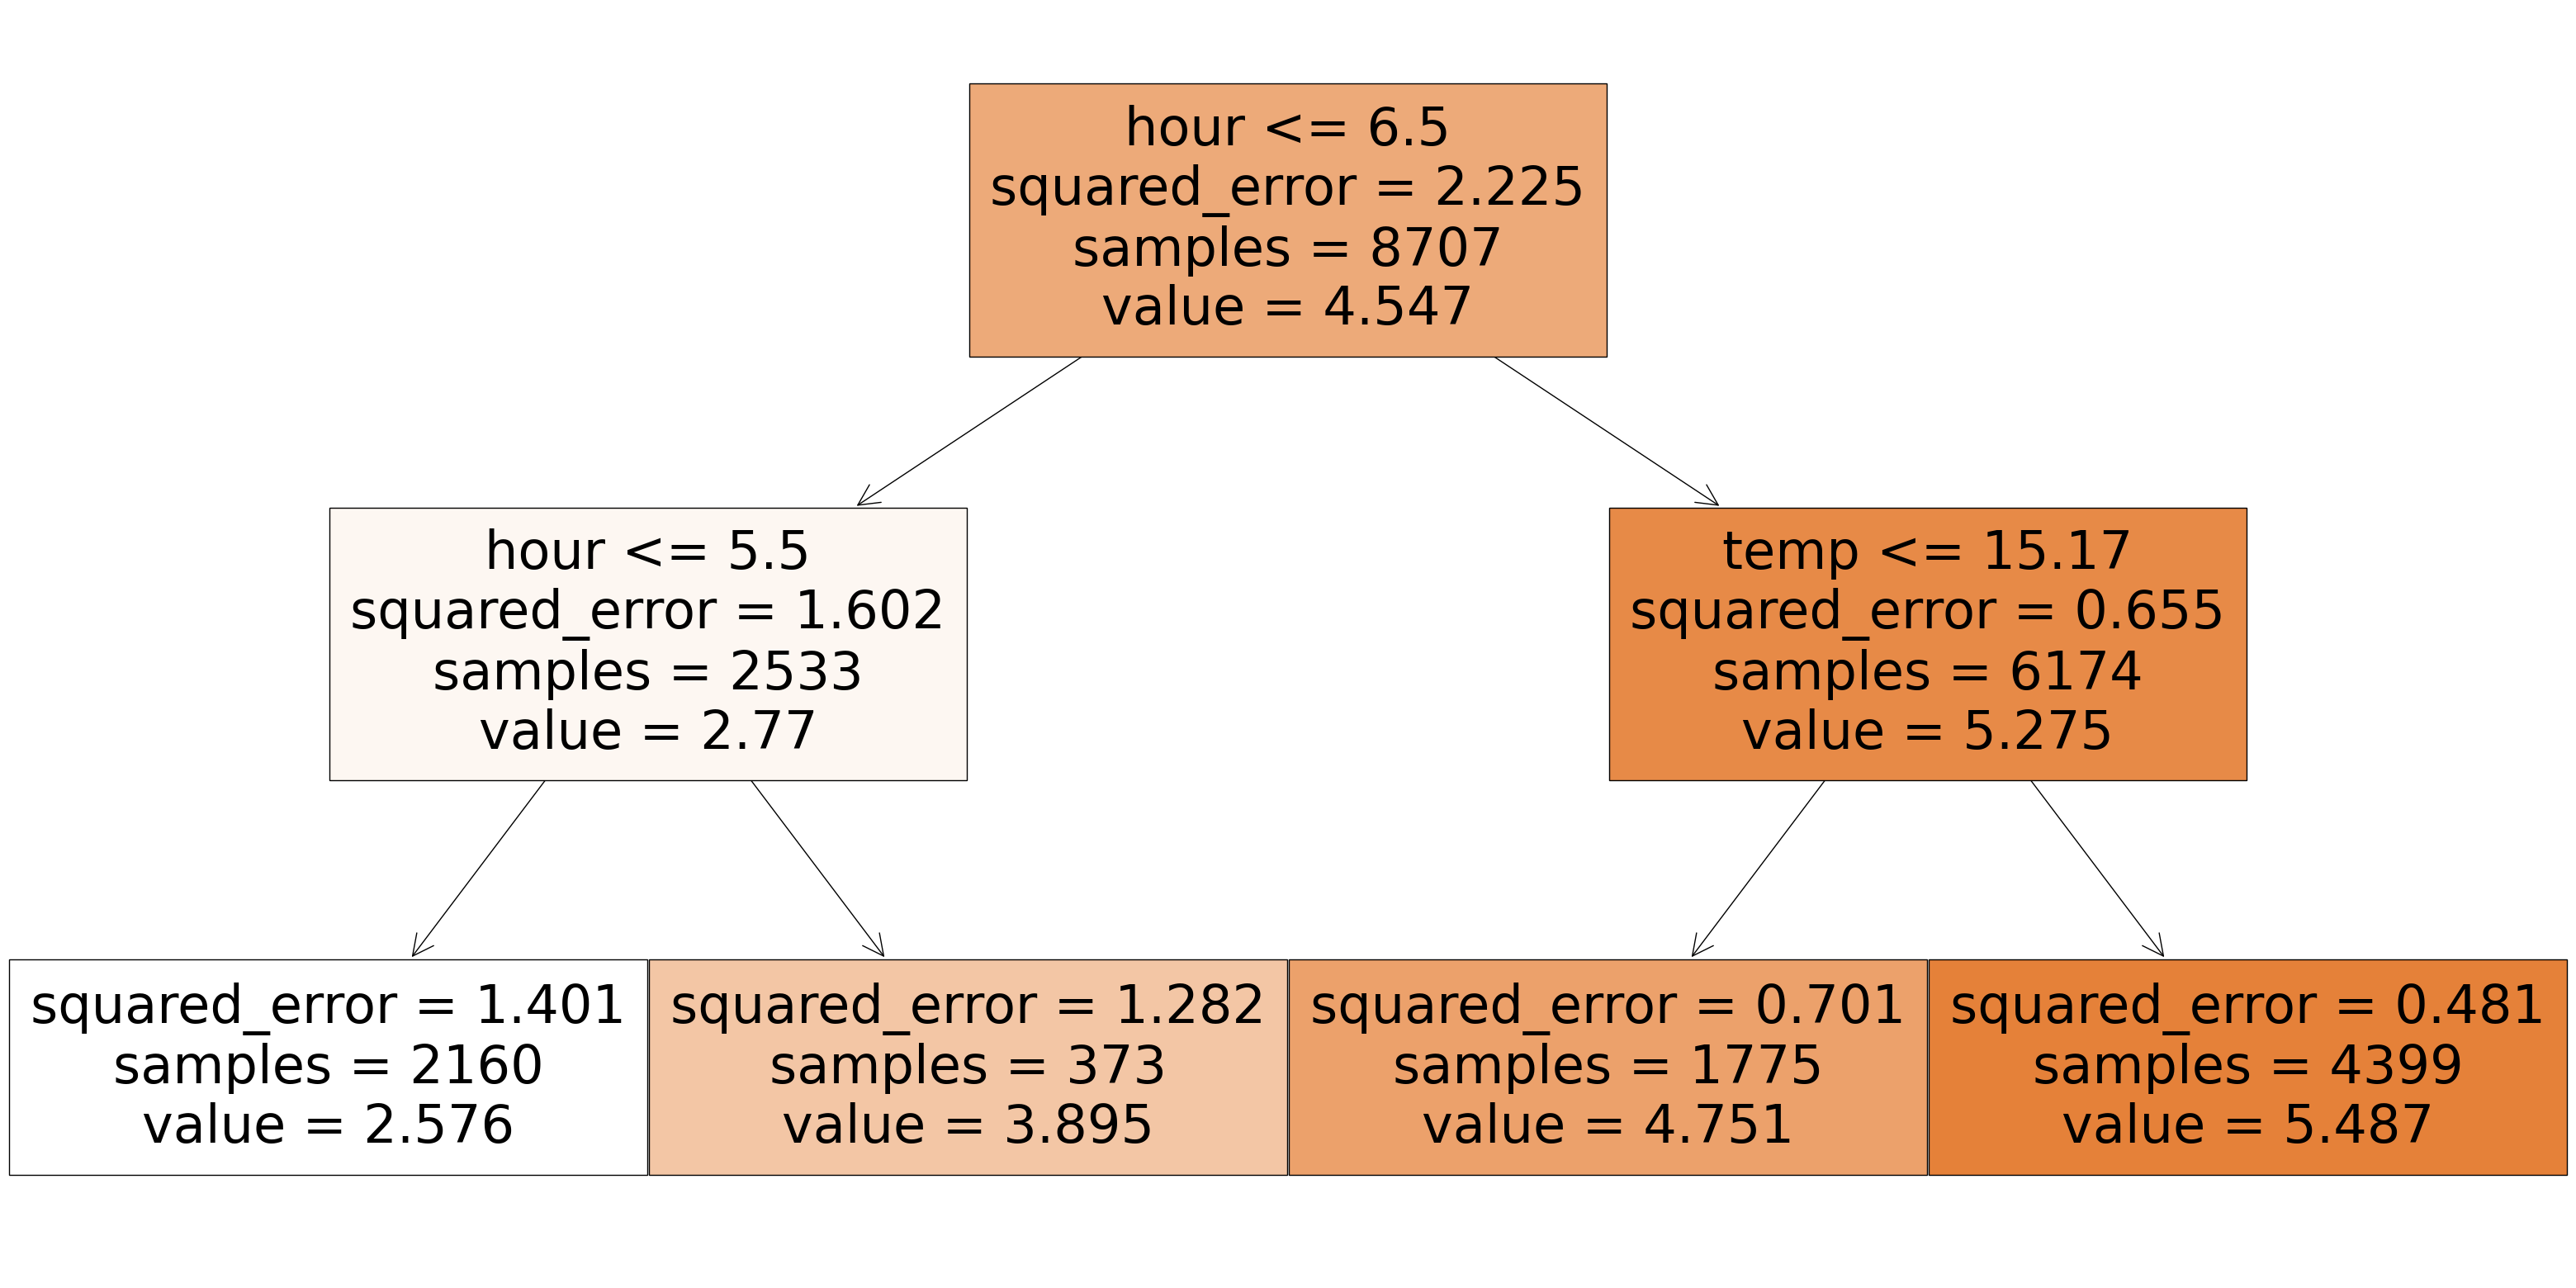

In [19]:
plt.figure(figsize = (40,20))
plot_tree(DT_model, feature_names=X_train.columns, filled = True)

In [18]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year', 'hour', 'weekday'],
      dtype='object')

In [20]:
DT_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.05485634,
       0.        , 0.        , 0.        , 0.94514366, 0.        ])

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
DT_model = DecisionTreeRegressor(max_depth = 4)

In [24]:
DT_model.fit(X_train, log_y_train)

DecisionTreeRegressor(max_depth=4)

In [25]:
DT_pred_train = DT_model.predict(X_train)
DT_pred_test = DT_model.predict(X_test)

In [26]:
RMSLE(log_y_train, DT_pred_train)

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    0.676239
dtype: float64

In [27]:
RMSLE(log_y_test, DT_pred_test)

count    0.687393
dtype: float64

[Text(0.5, 0.9, 'hour <= 6.5\nsquared_error = 2.225\nsamples = 8707\nvalue = 4.547'),
 Text(0.25, 0.7, 'hour <= 5.5\nsquared_error = 1.602\nsamples = 2533\nvalue = 2.77'),
 Text(0.125, 0.5, 'hour <= 1.5\nsquared_error = 1.401\nsamples = 2160\nvalue = 2.576'),
 Text(0.0625, 0.3, 'workingday <= 0.5\nsquared_error = 0.975\nsamples = 716\nvalue = 3.354'),
 Text(0.03125, 0.1, 'squared_error = 0.359\nsamples = 215\nvalue = 4.25'),
 Text(0.09375, 0.1, 'squared_error = 0.748\nsamples = 501\nvalue = 2.97'),
 Text(0.1875, 0.3, 'workingday <= 0.5\nsquared_error = 1.163\nsamples = 1444\nvalue = 2.191'),
 Text(0.15625, 0.1, 'squared_error = 1.14\nsamples = 472\nvalue = 2.708'),
 Text(0.21875, 0.1, 'squared_error = 0.982\nsamples = 972\nvalue = 1.939'),
 Text(0.375, 0.5, 'workingday <= 0.5\nsquared_error = 1.282\nsamples = 373\nvalue = 3.895'),
 Text(0.3125, 0.3, 'season <= 1.5\nsquared_error = 0.921\nsamples = 119\nvalue = 2.611'),
 Text(0.28125, 0.1, 'squared_error = 0.649\nsamples = 29\nvalue = 1

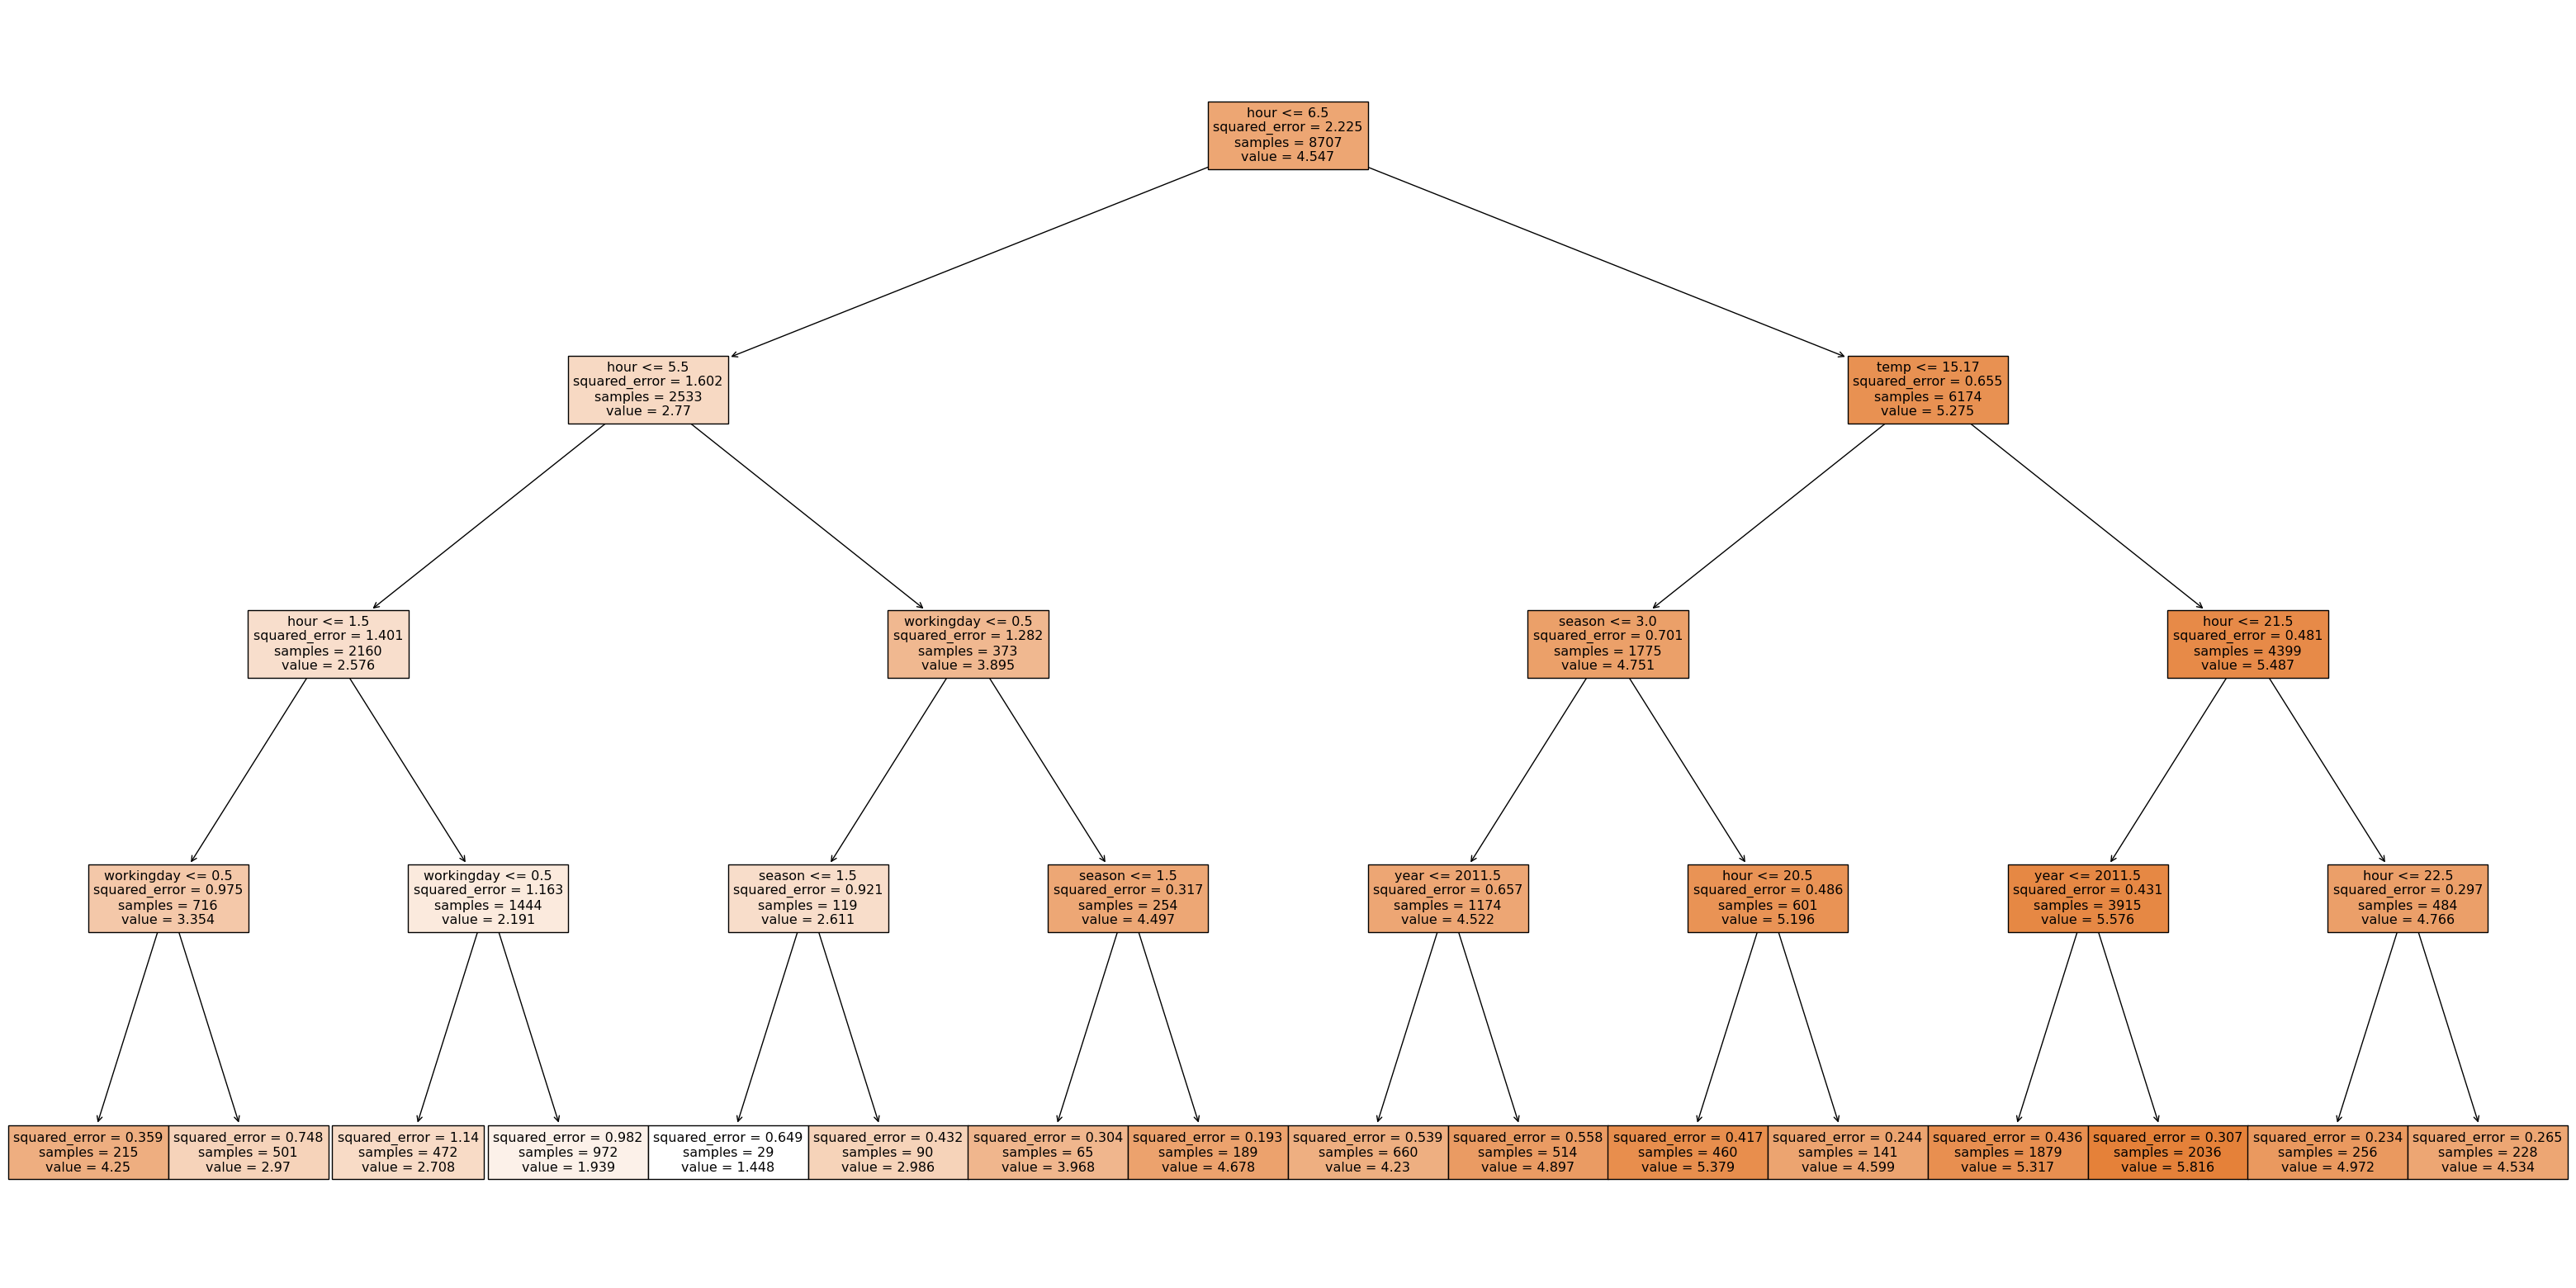

In [28]:
plt.figure(figsize = (40,20))
plot_tree(DT_model, feature_names=X_train.columns, filled = True)

In [29]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year', 'hour', 'weekday'],
      dtype='object')

In [30]:
DT_model.feature_importances_

array([0.01725928, 0.        , 0.04854361, 0.        , 0.04611582,
       0.        , 0.        , 0.02498759, 0.8630937 , 0.        ])

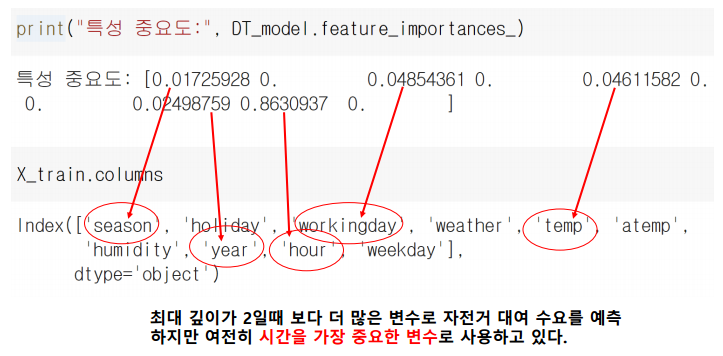

Text(0.5, 1.0, 'Feature Importance')

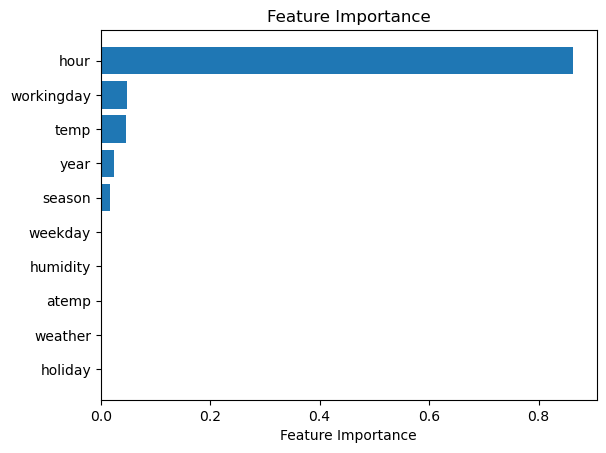

In [31]:
feature_importance = DT_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')

In [32]:
RF_model = RandomForestRegressor(n_estimators = 10)

In [33]:
RF_model.fit(X_train, log_y_train)

C:\Users\gng06\AppData\Local\Temp\ipykernel_15272\3269752645.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, log_y_train)


RandomForestRegressor(n_estimators=10)

In [34]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [35]:
RMSLE(log_y_train,RF_pred_train)

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    0.137853
dtype: float64

In [36]:
RMSLE(log_y_test,RF_pred_test)

count    0.327361
dtype: float64

In [37]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year', 'hour', 'weekday'],
      dtype='object')

In [38]:
RF_model.feature_importances_

array([0.04007119, 0.001566  , 0.03533593, 0.01207757, 0.04396208,
       0.01949545, 0.02358051, 0.03195274, 0.75946607, 0.03249246])

Text(0.5, 0, 'Feature Importance')

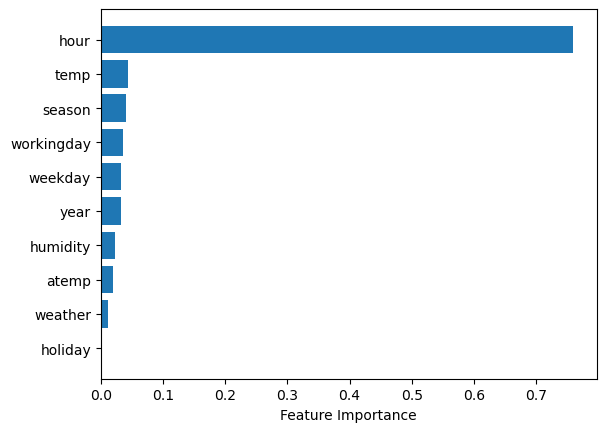

In [39]:
feature_importance = RF_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+0.5
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')

In [40]:
from sklearn.linear_model import LinearRegression
Lin_model=LinearRegression()
Lin_model.fit(X_train,log_y_train)

LinearRegression()

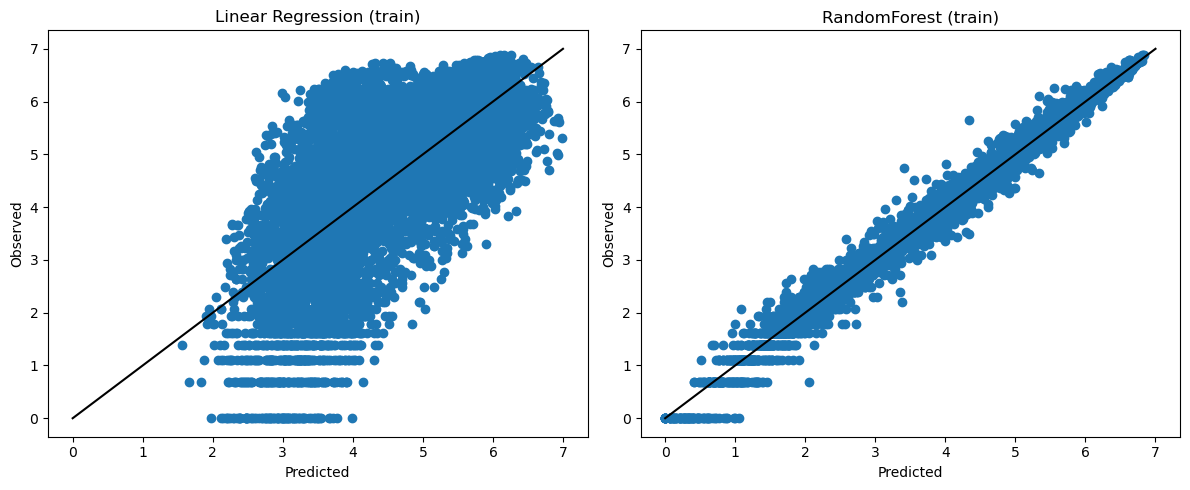

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x = np.linspace(0,7)
y=x
lines = plt.plot(Lin_model.predict(X_train), log_y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (train)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2 = plt.plot(RF_model.predict(X_train), log_y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('RandomForest (train)')
plt.tight_layout()

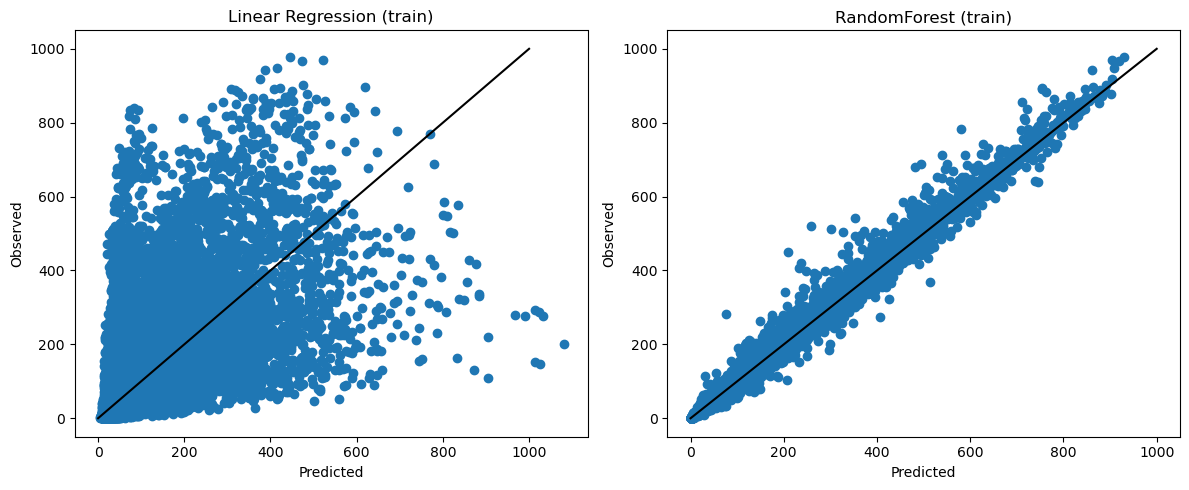

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x = np.linspace(0,1000)
y=x
lines = plt.plot(np.exp(Lin_model.predict(X_train)), y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (train)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2 = plt.plot(np.exp(RF_model.predict(X_train)), y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('RandomForest (train)')
plt.tight_layout()

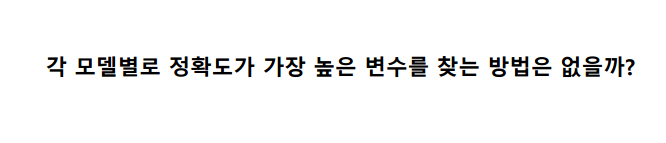

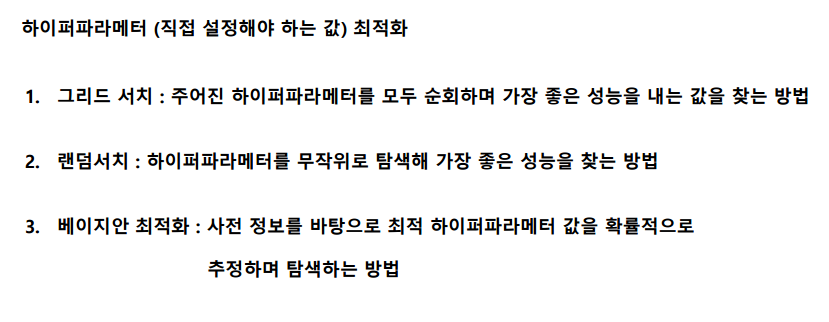

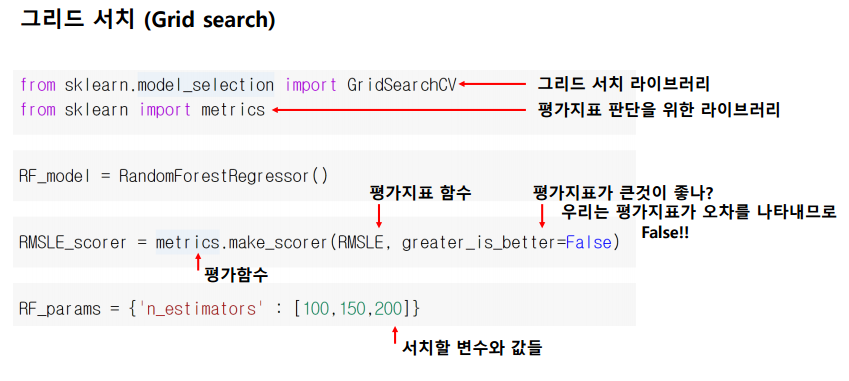

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [44]:
RF_model = RandomForestRegressor()

In [45]:
RMSLE_scorer = metrics.make_scorer(RMSLE, greater_is_better = False)

In [47]:
RF_params = {'n_estimators' : list(range(100,150,200))}

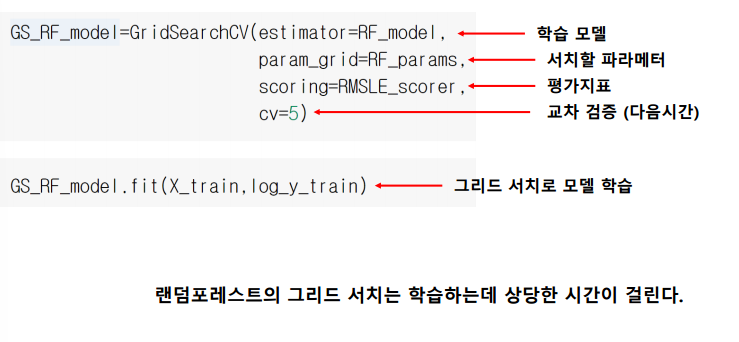

In [48]:
GS_RF_model = GridSearchCV(estimator=RF_model,
                           param_grid=RF_params,
                           scoring=RMSLE_scorer,
                           cv=5)

In [49]:
GS_RF_model.fit(X_train,log_y_train)

C:\Users\gng06\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\gng06\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a fu

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100]},
             scoring=make_scorer(RMSLE, greater_is_better=False))

In [50]:
GS_RF_model.best_params_

{'n_estimators': 100}

In [51]:
GS_RF_model.best_estimator_.predict(X_train)

array([6.02712991, 6.02230987, 3.14109519, ..., 5.74163312, 6.50660961,
       4.33266171])

In [52]:
RMSLE(log_y_train,GS_RF_model.best_estimator_.predict(X_train))

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    0.116694
dtype: float64

In [53]:
RMSLE(log_y_test,GS_RF_model.best_estimator_.predict(X_test))

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    0.30855
dtype: float64